In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
atl = pd.read_csv("team-data/Atlanta Dream (1).csv")

In [3]:
atl.head()

,PLAYER,2023 TYPE,2023,2024 TYPE,2024,2025 TYPE,2025,2026 TYPE,2026,2027 TYPE,2027,CORE YEARS,Unnamed: 12
0,Cheyenne Parker,V,"$216,100",V,"$200,000",UFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allisha Gray,V,"$194,600",V,"$185,000",V,"$190,000",UFA,NaN,NaN,NaN,NaN,NaN
2,Danielle Robinson,V,"$155,000",UFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Monique Billings,V,"$145,000",UFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nia Coffey,V,"$130,000",UFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ages1 = pd.read_html("player-data/WNBA Stats _ Players Bios1.html", flavor = "lxml")
ages2 = pd.read_html("player-data/WNBA Stats _ Players Bios2.html", flavor = "lxml")
ages3 = pd.read_html("player-data/WNBA Stats _ Players Bios3.html", flavor = "lxml")
ages4 = pd.read_html("player-data/WNBA Stats _ Players Bios4.html", flavor = "lxml")

In [5]:
ages = pd.concat([ages1[0], ages2[0], ages3[0], ages2[0]])
ages = ages.reset_index()[["Player", "Age"]]
ages

,Player,Age
0,A'ja Wilson,26
1,Aari McDonald,24
2,Aerial Powers,29
3,Aisha Sheppard,24
4,Alaina Coates,27
...,...,...
195,Kristine Anigwe,26
196,Kristy Wallace,27
197,Lexie Brown,28
198,Lexie Hull,23


In [6]:
all_players = pd.read_csv("all_players.csv")
all_players.sort_values(by = "PLAYER")

,Unnamed: 0,PLAYER,2023 TYPE,2023,2024 TYPE,2024,2025 TYPE,2025,2026 TYPE,2026,2027 TYPE,2027,CORE YEARS,TEAM
81,0,A'ja Wilson,V,"$202,154",UFA,0,0,0,0,0,0,0,0,Las Vegas Aces
5,5,Aari McDonald,U,"$78,586",R,"$89,302",RFA,0,0,0,0,0,0.0,Atlanta Dream
114,2,Aerial Powers,V,"$201,984",UFA,0,0,0,0,0,0,0,0,Minnesota Lynx
92,11,Aisha Sheppard,U,"$64,657",U,"$71,124",OPT,"$80,823",RFA,0,0,0,0,Las Vegas Aces
22,7,Alanna Smith,U,"$100,000",UFA,0,0,0,0,0,0,0,0,Chicago Sky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,9,Veronica Burton,U,"$70,609",U,"$77,669",OPT,"$88,261",RFA,0,0,0,0,Dallas Wings
48,14,Victoria Macaulay,TC,"$62,285",Reserved,0,0,0,0,0,0,0,0,Connecticut Sun
66,2,Victoria Vivians,V,"$135,000",V,"$137,000",UFA,0,0,0,0,0,0.0,Indiana Fever
107,12,Yang Liwei,TC,"$62,285",U,"$64,154",Reserved,0,0,0,0,0,0,Los Angeles Sparks


In [7]:
ages["Player"] = ages["Player"].astype(str)
all_players["PLAYER"] = all_players["PLAYER"].astype(str)
all_players["PLAYER"] = all_players["PLAYER"].str.split().str.join(' ')
merged = pd.merge(left = ages, right = all_players, left_on = "Player", right_on = "PLAYER").drop(["Unnamed: 0", "PLAYER"], axis = 1)

In [8]:
merged

,Player,Age,2023 TYPE,2023,2024 TYPE,2024,2025 TYPE,2025,2026 TYPE,2026,2027 TYPE,2027,CORE YEARS,TEAM
0,A'ja Wilson,26,V,"$202,154",UFA,0,0,0,0,0,0,0,0,Las Vegas Aces
1,Aari McDonald,24,U,"$78,586",R,"$89,302",RFA,0,0,0,0,0,0.0,Atlanta Dream
2,Aerial Powers,29,V,"$201,984",UFA,0,0,0,0,0,0,0,0,Minnesota Lynx
3,Aisha Sheppard,24,U,"$64,657",U,"$71,124",OPT,"$80,823",RFA,0,0,0,0,Las Vegas Aces
4,Alanna Smith,26,U,"$100,000",UFA,0,0,0,0,0,0,0,0,Chicago Sky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Shey Peddy,34,TC,"$74,305",UFA,0,0,0,0,0,0,0,0,Phoenix Mercury
177,Skylar Diggins-Smith,32,V,"$234,350",UFA,0,0,0,0,0,0,0,"2020, 2021, 2022, 2023",Phoenix Mercury
178,Sophie Cunningham,26,V,"$150,000",V,"$154,500",UFA,0,0,0,0,0,0,Phoenix Mercury
179,Stefanie Dolson,31,V,"$160,000",UFA,0,0,0,0,0,0,0,0,New York Liberty


In [9]:
for year in range(2023, 2026):
    merged[str(year)] = merged[str(year)].str.replace(",", "").str.extract('\$(.*)').astype(float)


In [10]:
merged

,Player,Age,2023 TYPE,2023,2024 TYPE,2024,2025 TYPE,2025,2026 TYPE,2026,2027 TYPE,2027,CORE YEARS,TEAM
0,A'ja Wilson,26,V,202154.0,UFA,NaN,0,NaN,0,0,0,0,0,Las Vegas Aces
1,Aari McDonald,24,U,78586.0,R,89302.0,RFA,NaN,0,0,0,0,0.0,Atlanta Dream
2,Aerial Powers,29,V,201984.0,UFA,NaN,0,NaN,0,0,0,0,0,Minnesota Lynx
3,Aisha Sheppard,24,U,64657.0,U,71124.0,OPT,80823.0,RFA,0,0,0,0,Las Vegas Aces
4,Alanna Smith,26,U,100000.0,UFA,NaN,0,NaN,0,0,0,0,0,Chicago Sky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Shey Peddy,34,TC,74305.0,UFA,NaN,0,NaN,0,0,0,0,0,Phoenix Mercury
177,Skylar Diggins-Smith,32,V,234350.0,UFA,NaN,0,NaN,0,0,0,0,"2020, 2021, 2022, 2023",Phoenix Mercury
178,Sophie Cunningham,26,V,150000.0,V,154500.0,UFA,NaN,0,0,0,0,0,Phoenix Mercury
179,Stefanie Dolson,31,V,160000.0,UFA,NaN,0,NaN,0,0,0,0,0,New York Liberty


In [18]:
grouped = merged.groupby("TEAM")[["2023", "2024", "2025"]].sum().T
grouped["League"] = grouped.aggregate(func = np.mean, axis = 1)
grouped

TEAM,Atlanta Dream,Chicago Sky,Connecticut Sun,Dallas Wings,Indiana Fever,Las Vegas Aces,Los Angeles Sparks,Minnesota Lynx,New York Liberty,Phoenix Mercury,Seattle Storm,Washington Mystics,League
2023,1329385.0,1914712.0,1112544.0,1065779.0,2092738.0,1849696.0,1940360.0,1641691.0,2018315.0,1379943.0,1356242.0,1444459.0,1.595489e+06
2024,775165.0,871003.0,561991.0,864472.0,1514245.0,1266087.0,599078.0,455419.0,273139.0,766626.0,610000.0,548993.0,7.588515e+05
2025,531890.0,358038.0,165366.0,397070.0,779477.0,249909.0,84543.0,214284.0,0.0,145500.0,0.0,286981.0,2.677548e+05


In [65]:
color_sequence = ["#C8102E", 
                  "#418FDE", 
                  "#DC4405", 
                  "#C4D600", 
                  "#FFCD00", 
                  "#85714D", 
                  "#702F8A", 
                  "#236192",
                  "#6ECEB2",
                  "#CB6015",
                  "#2C5234",
                  "#C8102E",
                  "black"]

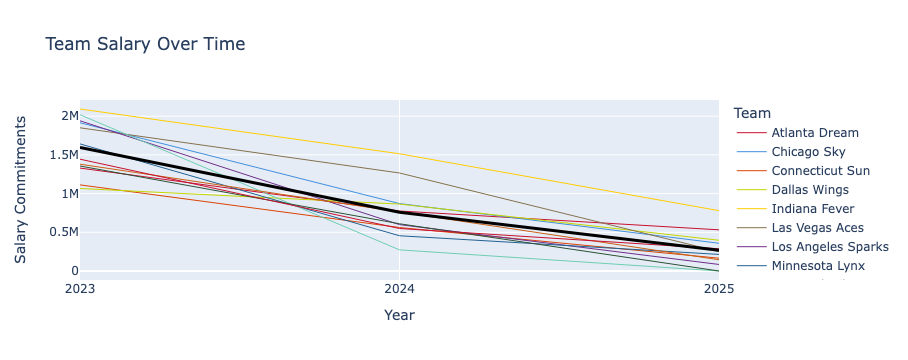

In [67]:
fig = px.line(grouped, title="Team Salary Over Time", x= grouped.index, y=grouped.columns[:], labels={'index': 'Year', 'value':'Salary Commitments', 'variable': 'Team'}, color_discrete_sequence=color_sequence)
for n in range(12):
    fig['data'][n]['line']['width']=1
fig['data'][12]['line']['width']=3
# Show plot 
fig.show()

In [59]:
copy = merged.copy().iloc[0]